In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import wrangle
import env

In [2]:
url = env.get_connection('mall_customers')
query = 'select * from customers'
df = pd.read_sql(query,url)

In [21]:
train, X_train, y_train, X_val, y_val, X_test, y_test = wrangle.split_data(df,'gender')

In [22]:
X_train,X_val,X_test = wrangle.scale_minmax(X_train,X_val,X_test)

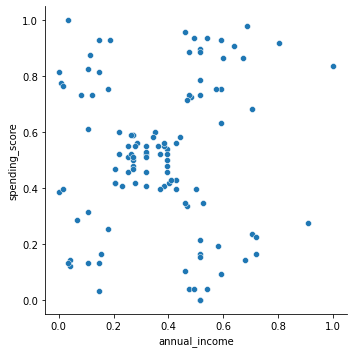

In [23]:
sns.relplot(data=X_train,x='annual_income',y='spending_score')

In [24]:
inertia = []
seed = 21
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train[['annual_income','spending_score']])
    inertia.append(kmeans.inertia_)

In [25]:
clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})

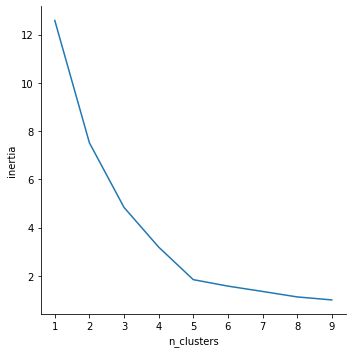

In [26]:
sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

Our largest acute angle is at n_clusters = 5

In [28]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score']])

KMeans(n_clusters=5, random_state=21)

In [30]:
X_train['cluster'] = kmeans.predict(X_train[['annual_income','spending_score']])

In [31]:
X_train.head()

,customer_id,age,annual_income,spending_score,cluster
135,0.678392,0.211538,0.475410,0.887755,2
78,0.391960,0.096154,0.319672,0.520408,1
50,0.251256,0.596154,0.221311,0.520408,1
163,0.819095,0.250000,0.540984,0.938776,2
141,0.708543,0.269231,0.491803,0.938776,2


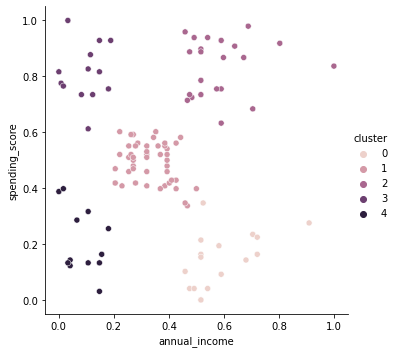

In [32]:
sns.relplot(data=X_train,x='annual_income',y='spending_score',hue='cluster')

In [33]:
inertia = []
seed = 21
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train[['annual_income','spending_score','age']])
    inertia.append(kmeans.inertia_)

In [34]:
clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})

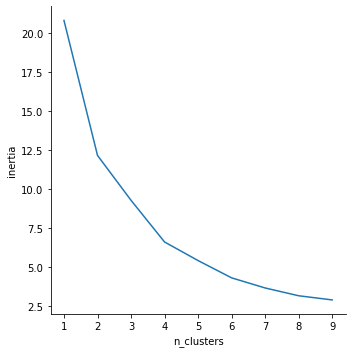

In [35]:
sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

Largest acute angle is at n_clusters =4

In [36]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score','age']])
kmeans.predict(X_train[['annual_income','spending_score','age']])

array([2, 1, 4, 2, 2, 1, 1, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 2, 1, 1, 3, 0,
       0, 1, 3, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 4, 4,
       3, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 3, 1, 4, 1, 2, 3, 0, 4, 0,
       4, 1, 2, 2, 3, 4, 3, 3, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 1, 4,
       0, 2, 0, 4, 3, 0, 0, 1, 4, 1, 4, 1, 0, 1, 4, 4, 4, 1, 4, 2, 2, 0,
       4, 1], dtype=int32)